# Viral propagation in a population

We want to see the difference between a population of party-goers (aka normal deer), and those that do social distancing.

Changes in this model, compared to the previous model:

Stage 1:

* No food, because it's not relevant
* No hunger
* No new babies (it's not about that anymore) (Stable population that doesn't change)

Stage 2:

* Add a vector of who's healthy and who's not
* Start with patient 0
* Output: New cases per tick as a function of time
* Running the visualization: healthy are black; infected are red

Stage 3:
* Infection based on minimal distance (which means that we'll need to calculate person-to-person distances, and have a piece of code similar to current cabbage-eating, except it will be about infectings others)
```
for every person:
    if infected:
        calculate distances to every other person
        find all other agents that are closer than the threshold
        infect them!
```

Stage 4:
* Parameter to model social distancing (something that turns them solitory if 0, or super-mixing together if 1): let's make them wiggle (vx = np.random.rnorm(...) * speed) , and let's change the speed

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

In [38]:
# Define constants, but we do it as a class (to later make passing it around easier)

class Const: # Carefree remote-eating cheaters
    def __init__(self):
        self.n_trials = 1
        self.n_animals = 200
        self.n_steps = 300
        self.speed = 0.02
        self.arena_size = 3
        self.contagion_distance = 0.1**2 # Distance squared, to avoid sqrt() later

In [39]:
# Build the model
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))

    for i_trial in range(n_trials):        
        x = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals)
        y = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals)
        vx = np.zeros(c.n_animals)
        vy = np.zeros(c.n_animals)
        infected = np.zeros(c.n_animals)
        infected[0] = 1 # Patient zero
        
        stats = np.zeros(c.n_steps) # What is reported from every trial
    
        if show_dotses: # Init plots
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots; just creating axes
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy
            
            vx = np.random.randn(c.n_animals)*c.speed 
            vy = np.random.randn(c.n_animals)*c.speed
            # Make them run around (keeps speed somewhat randomized)

            # Reflect from the walls
            #vx = np.where(np.logical_or(x>c.arena_size, x<0), -vx , vx)
            #vy = np.where(np.logical_or(y>c.arena_size, y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x, c.arena_size)) # Keep them in enclosure
            y = np.maximum(0,np.minimum(y, c.arena_size))
            
            for i_animal in range(c.n_animals):
                if infected[i_animal]==1:
                    d = np.square(x-x[i_animal]) + np.square(y-y[i_animal])
                    victims = np.argwhere(d < c.contagion_distance)
                    infected[victims] = 1
                
            stats[t] = np.sum(infected)/c.n_animals
            
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[infected==0], y[infected==0], 'k.', markersize=5);
                plt.plot(x[infected==1], y[infected==1], 'r.', markersize=5);
                plt.xlim((0,c.arena_size));
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
            else:
                print('.',end='')
        # --- Time loop is over

        history[:,i_trial] = stats
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


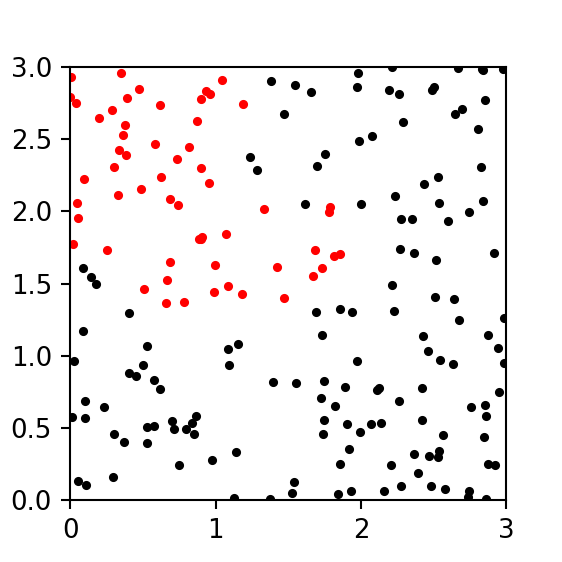

<IPython.core.display.Javascript object>


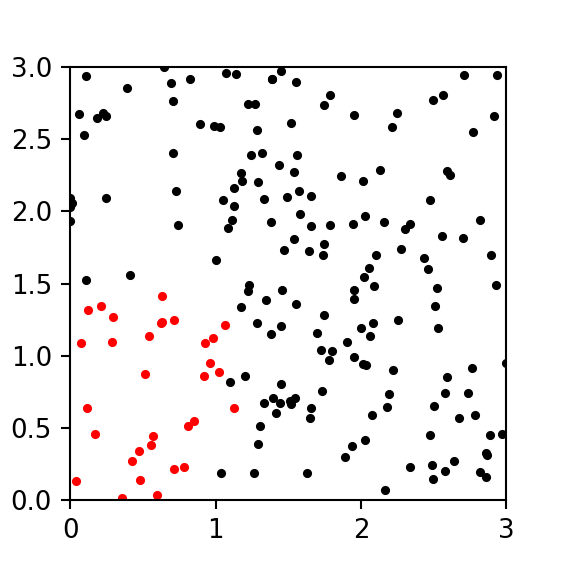

<IPython.core.display.Javascript object>


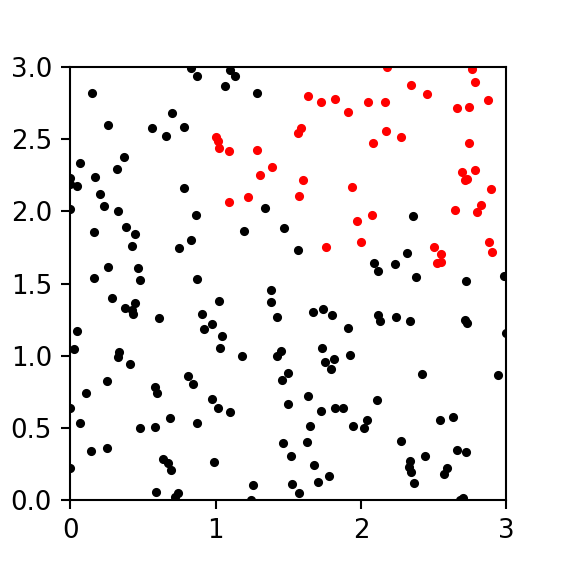

Wall time: 39.4 s


<IPython.core.display.Javascript object>


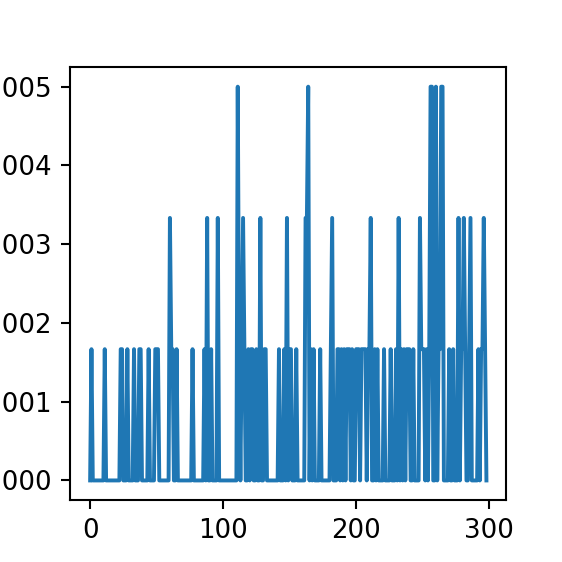

In [40]:
c = Const()
#np.random.seed(1)
%time curve = model(c, show_dotses=True, n_trials=1);
plt.figure(figsize=(3,3))
plt.plot(np.diff(curve))

In [14]:
# For this to happen, you would need to go to conda command line
# and run:
# conda install line_profiler

%load_ext line_profiler
%lprun -f model model(c,show_dotses=False)

....................................................................................................